In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from utils import *
update_plot_defaults()
%load_ext autoreload
%autoreload 2

# Current-Voltage relationship (I-V)

## 1. Choose the data file you want to analyze

In [2]:
pathToData = "data/"
data_folders = glob(pathToData+"*") # The glob function helps you filter your files
print("Data folders:")
data_folders

Data folders:


['data/Fig_Nav',
 'data/single_channel_recordings',
 'data/Fig_Cav',
 'data/example_HEKA.dat',
 'data/link_to_data.txt',
 'data/Fig_Kv']

In [3]:
data_files = glob(data_folders[0]+"/*.abf")
print(data_folders[0])
data_files

data/Fig_Nav


['data/Fig_Nav/nav18-iv.abf',
 'data/Fig_Nav/nav18-ssinact.abf',
 'data/Fig_Nav/nav18-nav_recovery.abf',
 'data/Fig_Nav/NAV_Tho(1)_21309013.abf',
 'data/Fig_Nav/NAV_Cerv(3)_22712021.abf',
 'data/Fig_Nav/NAV_Tho(2)_21309018.abf',
 'data/Fig_Nav/NAV_Cerv(1)_22712019.abf',
 'data/Fig_Nav/NAV_Cerv(2)_22712020.abf',
 'data/Fig_Nav/NAV_Lomb(1)_22919024.abf',
 'data/Fig_Nav/NAV_Lomb(2)_22919023.abf']

In [4]:
data_file = 'data/Fig_Nav/nav18-iv.abf'

In [5]:
## Extract the sweeps, time and sampling frequency:
sweeps, sweeps_time, sampling_freq = get_sweeps(data_file)

print(sweeps.shape)
print(sweeps_time.shape)
print(f"freq: {sampling_freq} Hz")

(26, 2, 5160)
(5160,)
freq: 99999.99999999999 Hz


## 2. Plot the traces to get an overview of the data

array([<Axes: ylabel='Current (pA)'>,
       <Axes: xlabel='Time (ms)', ylabel='Voltage (mV)'>], dtype=object)

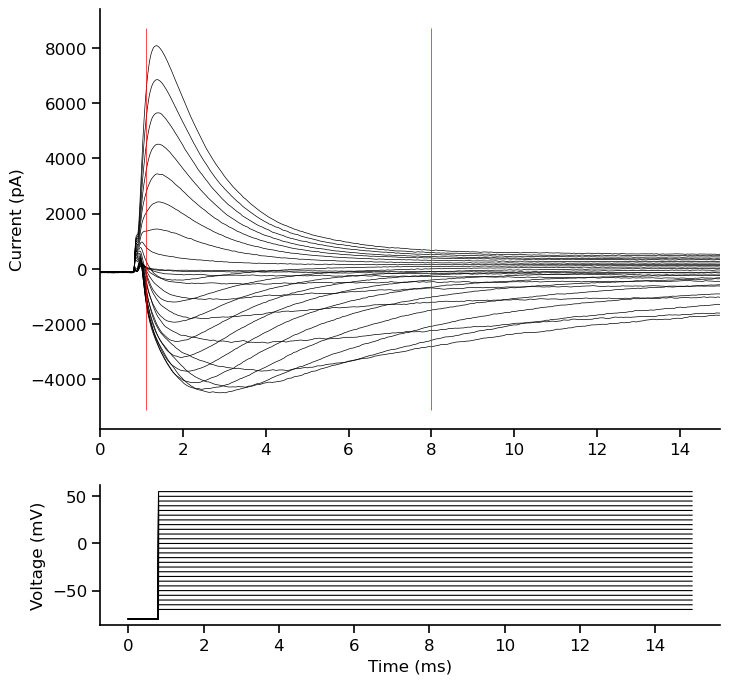

In [6]:
start_time = 0 # milliseconds
end_time = 15 # milliseconds

# marker_1 = None
# marker_2 = None
marker_1 = 1.1 # milliseconds
marker_2 = 8 # milliseconds

current_traces, time_in_window = select_sweep_window(sweeps, sweeps_time, start_time, end_time, sampling_freq, channel=0)
voltage_traces, time_in_window = select_sweep_window(sweeps, sweeps_time, start_time, end_time, sampling_freq, channel=1)

plot_traces(time_in_window, current_traces, voltage_traces, marker_1, marker_2)

## 3. Select what you want to measure:
- define the time window(s) of interest
- define what you want to measure (e.g. mean or peak voltage/current)

### 3.1. Optional: apply baseline correction

In [7]:
# # 1. Measure baseline
# start_time = 0 # milliseconds
# end_time = 0.5 # milliseconds
# measurement_type = 'mean' # Options: 'mean', 'max', 'min'

# baseline_voltage, baseline_current = get_step_measurements(sweeps, sweeps_time, start_time, end_time, sampling_freq, measurement_type)

# # 2. Subtract baseline from the sweeps
# num_traces = sweeps.shape[0]
# for i in range(num_traces):
#     sweeps[i,0] -= baseline_current[i]
#     # sweeps[i,1] -= baseline_voltage[i]

# plot_traces(time_in_window, current_traces, voltage_traces, marker_1, marker_2)

### 3.2. Measure currents/voltage steps

<Axes: xlabel='V (mV)', ylabel='I (pA)'>

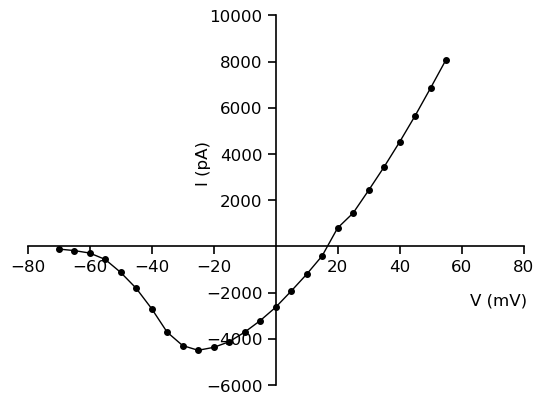

In [8]:
start_time = marker_1 # milliseconds
end_time = marker_2 # milliseconds
measurement_type = 'peak' # Options: 'mean', 'max', 'min', 'peak'

voltage_steps, current_steps = get_step_measurements(sweeps, sweeps_time, start_time, end_time, sampling_freq, measurement_type)

plot_IV(voltage_steps, current_steps, xlabel_coords=(0.95,0.25), ylabel_coords=(0.37,0.6))

### Optional: fit a line to the I-V points and get the slope

Reversal potential: 16.515 mV


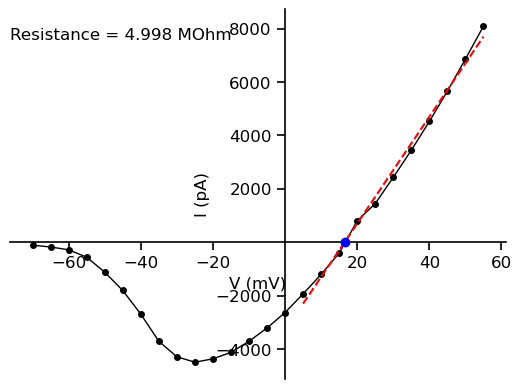

In [22]:
points_start = 15
points_end = len(voltage_steps)

ax = plot_IV(voltage_steps, current_steps)

voltage_steps_to_fit = voltage_steps[points_start:points_end]
current_steps_to_fit = current_steps[points_start:points_end]

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(voltage_steps_to_fit, current_steps_to_fit)
ax.plot(voltage_steps_to_fit, slope * voltage_steps_to_fit + intercept, linestyle='--', color='r', label='Fit')

ax.text(0., 0.95, f"Resistance = {1/slope * 1000:.3f} MOhm", transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Find the intercept on the x-axis (where current is zero)
intercept_x = -intercept / slope
ax.scatter(intercept_x, 0, color='b', zorder=5)
print(f"Reversal potential: {intercept_x:.3f} mV")
